## Getting Started

In the project, We'll be working with the Stanford Open Policing Project.
The stanford policing projects gathers, analyzes, and releases records from millions 
of traffic stops by law enforcement agencies across the countries.
Stanford Open Policing Project has many datasets, The one I'll be working with is the Rhode Island state.
Our goal is to apply Data Analysis and Visualization techniques by asking some interesting questions
and visualizing the different relationships in the dataset.

### Note:
The dataset we're working was downloaded from one of the courses from DataCamp Data Analyst Track.
But you can download any dataset you want for the rest of the states.
I chose to work with this dataset as it's kind of simple, and loads quickly as it only contains 91742 stops.

Datasets available to work with:
https://openpolicing.stanford.edu/data/

### Exploring the dataset
#### Note: 
* We mainly focused on the correlation between different variables and not the causation (Exploring relationships only).
* Not going to draw any conclusions about causation: would need additional data and expertise

Run the code below to load necessary Python libararies and load the rhode island policing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
ri = pd.read_csv('ri_police.csv')
# Display the first record
display(ri.head(1))

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,04-01-05,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [2]:
print(ri.shape)
# Count the number of missing values in each column
print(ri.isnull().sum())

(91741, 15)
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


Often, a DataFrame will contain columns that are not useful to our analysis. Such columns should be dropped from the DataFrame, to make it easier for us to focus on the remaining columns.

In [3]:
# Drop both the county_name and state columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [4]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)
print(ri.shape)
print(ri.isnull().sum())

(86536, 13)
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [5]:
# Fixing data types
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [6]:
# Concatenate 'stop_date' and stop_time (seperated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)
print(ri.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


### Exploring the relationship between gender and policing


Before comparing the violations being commited by each gender, we should examine the violations commited by all drivers to get baseline understanding of the data.

#### Q1: Do the genders commit different violations?

In [7]:
# Count the unique values in 'violation'
display(ri['violation'].value_counts())
# Express the counts as proportions
display(ri['violation'].value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

The question we're trying to answer is whether male and female drivers tend to commit differnt types of traffic violations

In [8]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
display('Female Violations:', female.violation.value_counts(normalize=True))
# Compute the violations by male drivers (as proportions)
display('Male Violations:', male.violation.value_counts(normalize=True))

'Female Violations:'

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

'Male Violations:'

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

#### A1:
About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

#### Q2: Does gender affect who gets a ticket for speeding?


##### Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

In [9]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') &
                        (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') &
                        (ri.violation == 'Speeding')]
# Compute the stop outcomes for female drivers (as proportions)
display('Female and Speeding:',female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
display('Male and Speeding',male_and_speeding.stop_outcome.value_counts(normalize=True))

'Female and Speeding:'

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

'Male and Speeding'

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

#### A2: The data fails to show!
Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

#### Q3: Does gender affect whose vehicle is searched?

Calculating the search rate:
During a traffic stop, the police officer sometimes conducts a search of the vehicle

In [10]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


Great! It looks like the search rate is about 3.8%. Next, we'll examine whether the search rate varies by driver gender.

In [11]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


###### Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation. Let's find out if that's the case!

In [12]:
# Calculate the search rate for each combination of gender and violation
display(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

#### A3: Yes, gender affect whose vechile is searched!
As for all types of violations, the search rate is higher for males than for females
disproving our hypothesis that the search rate varies by violation type and the difference in search rate between females and males is because they tend to commit different violtions

#### Q4: Does gender affect who is frisked during a search?

In [13]:
print("Search conducted:\n",ri.search_conducted.value_counts())

Search conducted:
 False    83229
True      3307
Name: search_conducted, dtype: int64


###### Note:
search_conducted column returns 'True' if a search is conducted and 'False' otherwise (if no search is conducted or
value is missing 'NaN').

In [14]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [15]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

Lets focus on inventory, meaning searches in which the police took an inventory of the vehicle.
Looking at third line of the value_counts() output, we see 219 which is the number of searches in which inventory was the only search type.
But what if we wanted to know the total number of times an inventory was done during a search?
We'd have to include any stops in which 'inventory' was one of multiple search types.

In [16]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)
ri.inventory.dtype
ri.inventory.sum()

441

Inventory was done in 441 searches, this includes 219 stops in which inventory was the only search type.
Plus additional stops in which inventory was one of multiple search types.
Now we want to calculate the percentage of searches which included an 'inventory'

In [17]:
# Calculating inventory rate
print(ri.inventory.mean())

0.0050961449570121106


You'd think that the calculation above is True but it's not really.
But what's wrong?
0.5% is the percentage of all traffic stops that resulted an inventory
including, those stops in which a search was not even done.


Insead, we first need to filter the DataFrame to only include those rows 
in which a search was done, and then take the mean of the inventory column.

In [18]:
# subset the ri dataset
searched = ri[ri['search_conducted'] == True]
print("%Searches that included an inventory:", searched.inventory.mean()*100)

%Searches that included an inventory: 13.335349259147264


###### Counting protective frisks
During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In [19]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print("frisk sum:",ri['frisk'].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [20]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


#### A4: The frisk rate is higher for males than for females.
But we can't conclude that this difference is caused by the driver's gender.

#### Q5: Does time of the day affect arrest rate?
When a police officer stops a driver, a small percentage of those stops ends in an arrest.
This is known as the arrest rate.

In [21]:
# Calculate the overall arrest rate
print("overall arrest rate:",ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

overall arrest rate: 0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


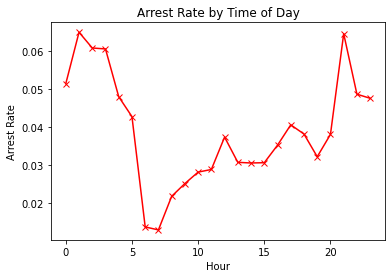

In [22]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(marker='x', color='r')
# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

#### A5: apparently Yes!
The arrest rate has a significant spike overnight, and then dips in the early morning hours.

#### Q6: Are drug-related stops on the rise?

###### Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search.
We'll assess whether these drug-related stops are becoming more common over time.

In [23]:
# Calculate the annual rate of drug-related stops by two ways
annual_drs_1 = ri.groupby(ri.index.year).drugs_related_stop.mean()
print("shape and type 1:",annual_drs_1.shape, annual_drs_1.dtype)
# Another way of gettin the annual rate of drug-related stops
annual_drs_2 = ri.drugs_related_stop.resample('A').mean()
print("shape and type 2:",annual_drs_2.shape, annual_drs_2.dtype)
# resample('A') means that the sampling frequency is a year

shape and type 1: (11,) float64
shape and type 2: (11,) float64


###### To save you the pain of trying to look up the resample strings, I’ve added the table below:

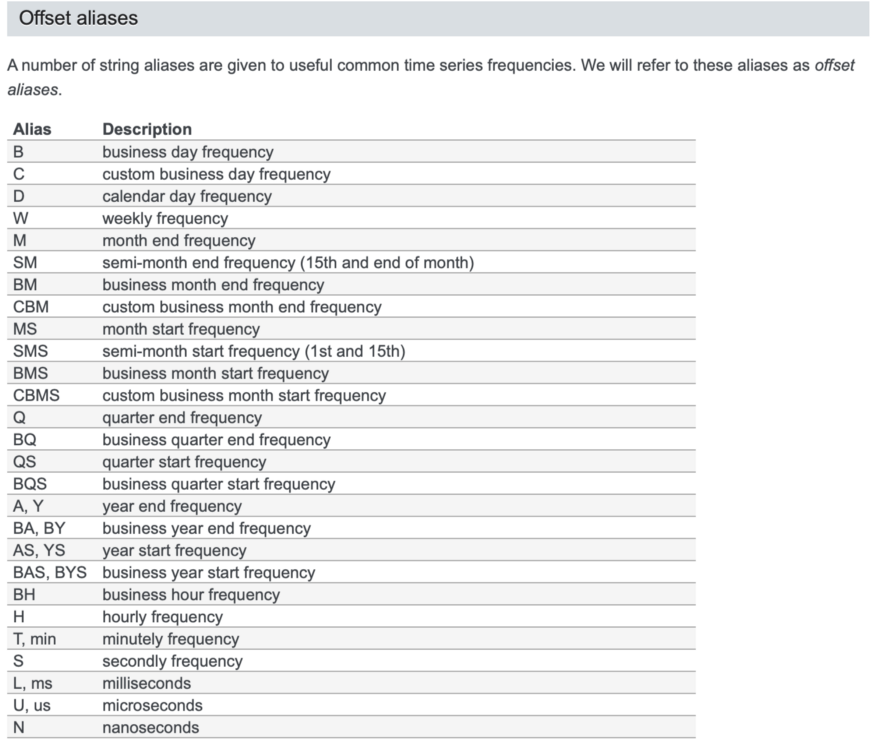

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


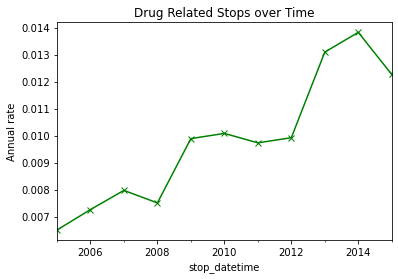

In [24]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot(marker='x', color='g')
plt.ylabel("Annual rate")
plt.title("Drug Related Stops over Time")
# Display the plot
plt.show()

#### A6: Yes!
The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

###### Comparing drug and search rates
The rate of drug-related stops increased significantly between 2005 and 2015. we might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

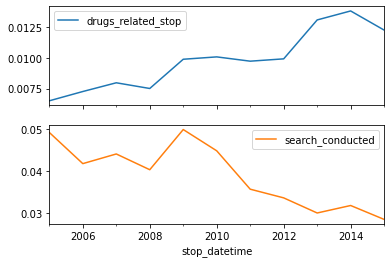

In [25]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

#### Q7: What violations are caught in each district?

###### Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In [26]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])
# Select rows 'Zone x1' through 'Zone X4'
print(all_zones.loc['Zone X1':'Zone X4'])

# Save the tables as 'k_zones' and 'x_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']
x_zones = all_zones.loc['Zone X1': 'Zone X4']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

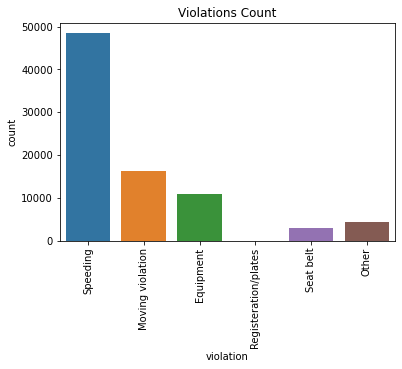

In [27]:
# Lets start by visualizing the total violations count in the whole dataset
violations_order = ['Speeding', 'Moving violation', 'Equipment',
                    'Registeration/plates', 'Seat belt', 'Other']
c = sns.countplot(x='violation', data=ri, order=violations_order)
c.set_title('Violations Count')
plt.xticks(rotation=90)
plt.show()

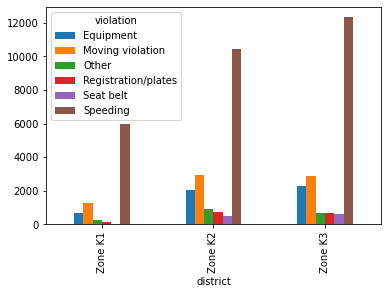

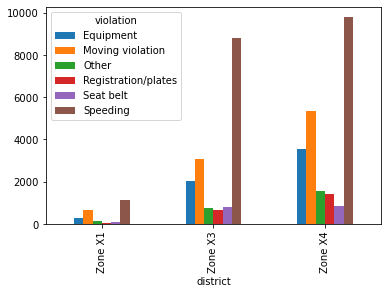

In [28]:
# Create a bar plot of 'k_zones' and 'x_zones'
k_zones.plot(kind='bar')
x_zones.plot(kind='bar')
# Display the plot
plt.show()

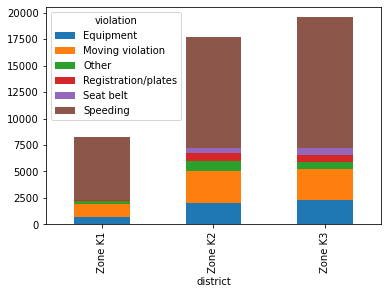

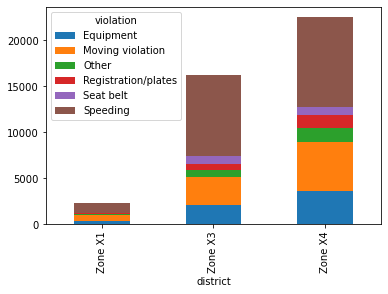

In [29]:
k_zones.plot(kind='bar', stacked=True)
x_zones.plot(kind='bar', stacked=True)
# Display the plot
plt.show()

#### A7:
##### K_zones:
The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to each other in terms of violations
##### X_zones:
Zones X3 and X4 have similar traffic stops, While zone X1 seems to have the least traffic stops in all of districts.

#### Q8: How long might you be stopped for a violation?


###### Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can we make this data easier to analyze?
We'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:
* Convert '0-15 Min' to 8 
* Convert '16-30 Min' to 23
* Convert '30+ Min' to 45

You might wonder why these specifc integers?
Well, it's the average of the period start and end.
* 8 = 0 + 15 / 2
* 23 = 16 + 30 / 2
* 45 = 30 +60 / 2

In [30]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8,
            '16-30 Min': 23,
            '30+ Min': 45}
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)
# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


Next, We'll analyze the stop duration length for each type of violation.

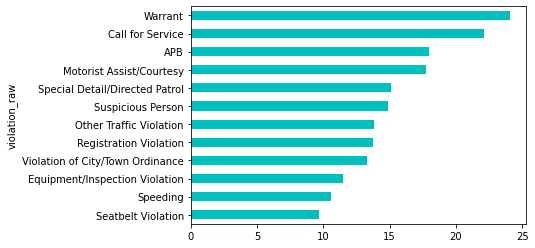

In [31]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
# Sort 'stop_length' by its values then recreate the plot
stop_length_sorted = stop_length.sort_values()
stop_length_sorted.plot(kind='barh', color='c')
# Display the plot
plt.show()

#### A8: It depends on each type of violations.
You can see visually in the cell above
and numerically in the cell below.

In [32]:
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
# Ceil the stop_length for each type of violation
stop_length_int = np.ceil(stop_length)
stop_length_sorted = stop_length_int.sort_values(ascending=False)
display(stop_length_sorted)

violation_raw
Warrant                             25.0
Call for Service                    23.0
APB                                 18.0
Motorist Assist/Courtesy            18.0
Special Detail/Directed Patrol      16.0
Suspicious Person                   15.0
Other Traffic Violation             14.0
Registration Violation              14.0
Violation of City/Town Ordinance    14.0
Equipment/Inspection Violation      12.0
Speeding                            11.0
Seatbelt Violation                  10.0
Name: stop_minutes, dtype: float64

## Final Thoughts:
It's important to remember that the data analysis process is there to solve either a businsess problem or a real life problem.

This is done by asking the right questions, and then doing data wrangling and visualization to answer these questions and gain new insight on the data

Hope you've enjoyed the process.